<a href="https://colab.research.google.com/github/mustafiz-07/Data/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 2

##Importing the dataset

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter


file_path = "Social_Network_Ads.csv"


df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshrau/social-network-ads",
  file_path,
  )


/tmp/ipython-input-2-302395021.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 10.7k/10.7k [00:00<00:00, 8.76MB/s]


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##Importing the important library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Matplotlib Pie Plot Questions**

##Task 1

In [ ]:
counts=df['Purchased'].value_counts()
counts

,count
Purchased,
0,257
1,143


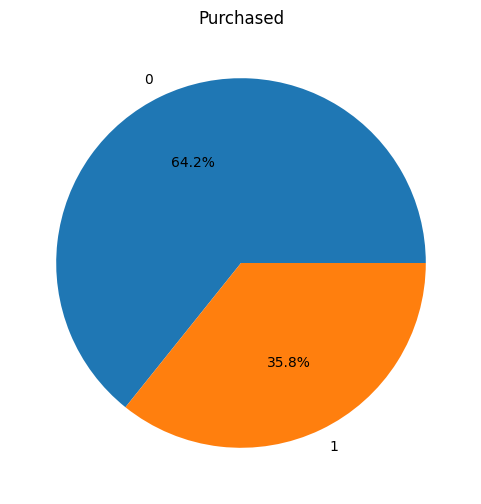

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title('Purchased')
plt.show()

##Task 2

In [ ]:
counts1=df['Gender'].value_counts()
counts1

,count
Gender,
Female,204
Male,196


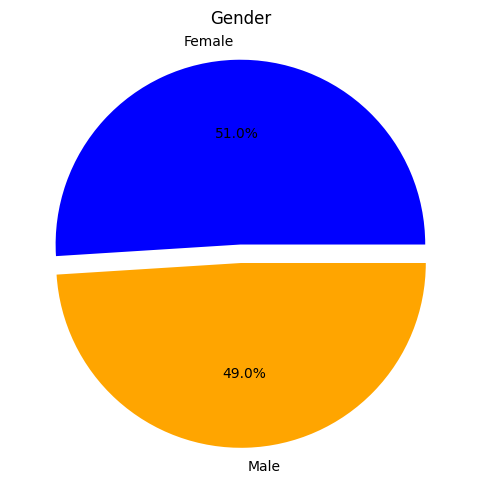

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(counts1,labels=counts1.index,colors=['blue','orange'],explode=[0.1,0], autopct='%1.1f%%')
plt.title('Gender')
plt.show()

##Task 3

In [ ]:
bins = [0,25, 35, 45, 100]
label = ['18-25', '26-35', '36-45', '46+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=label, right=True)
age_group_counts = df['AgeGroup'].value_counts()
age_group_counts


,count
AgeGroup,
26-35,129
36-45,119
46+,103
18-25,49


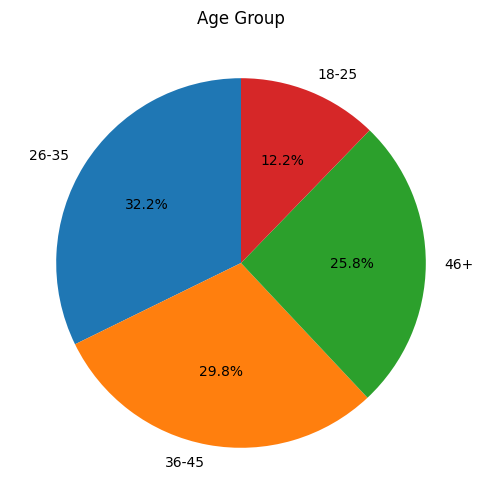

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Age Group')
plt.show()


##Task 4

In [ ]:
df[df['Purchased']==1]['Gender'].value_counts()

,count
Gender,
Female,77
Male,66


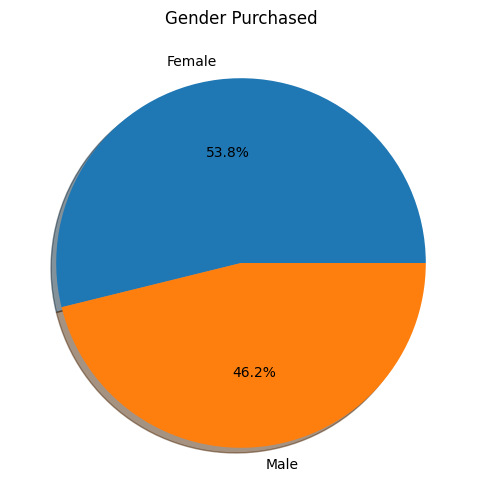

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df[df['Purchased']==1]['Gender'].value_counts(),labels=df[df['Purchased']==1]['Gender'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.title('Gender Purchased')
plt.show()

##Task 5

In [ ]:
medianSalay=df['EstimatedSalary'].median()
salary=df['EstimatedSalary'].apply(lambda x: 1 if x>medianSalay else 0).value_counts()
salary
#0 for below and 1 for above


,count
EstimatedSalary,
0,203
1,197


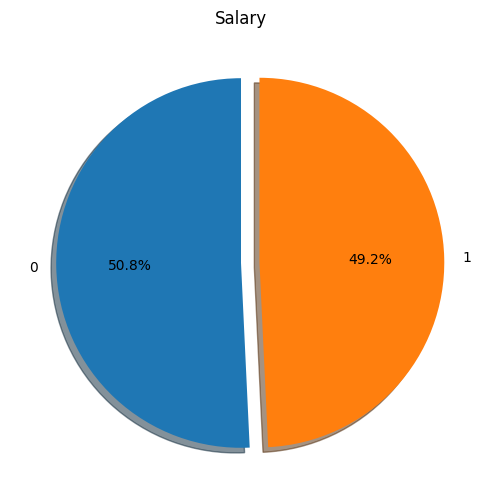

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(salary,labels=salary.index,autopct='%1.1f%%',
        explode = [0.1 if label == 1 else 0 for label in salary.index],
        shadow=True,startangle=90)
plt.title('Salary')
plt.show()


# **Seaborn Visualization Tasks:**

##Task 1

/tmp/ipython-input-15-3423834926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Purchased'] == 1], x='Gender', palette='pastel')


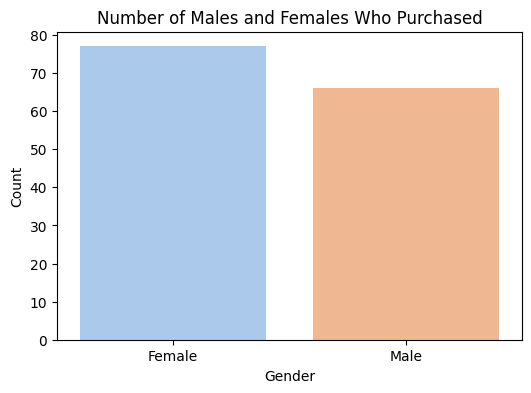

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Purchased'] == 1], x='Gender', palette='pastel')
plt.title('Number of Males and Females Who Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##Task 2

/tmp/ipython-input-16-1657384372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Purchased', y='EstimatedSalary', palette='Set2')


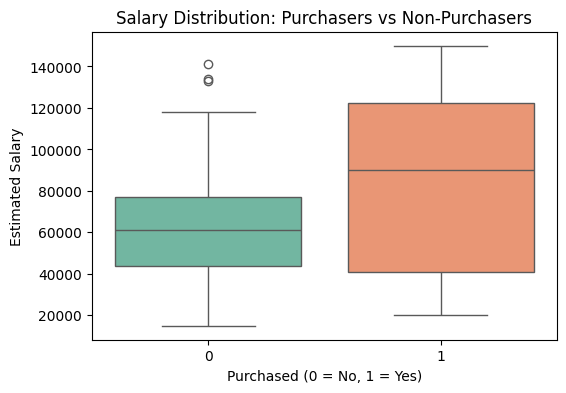

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Purchased', y='EstimatedSalary', palette='Set2')
plt.title('Salary Distribution: Purchasers vs Non-Purchasers')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Estimated Salary')
plt.show()


##Task 3

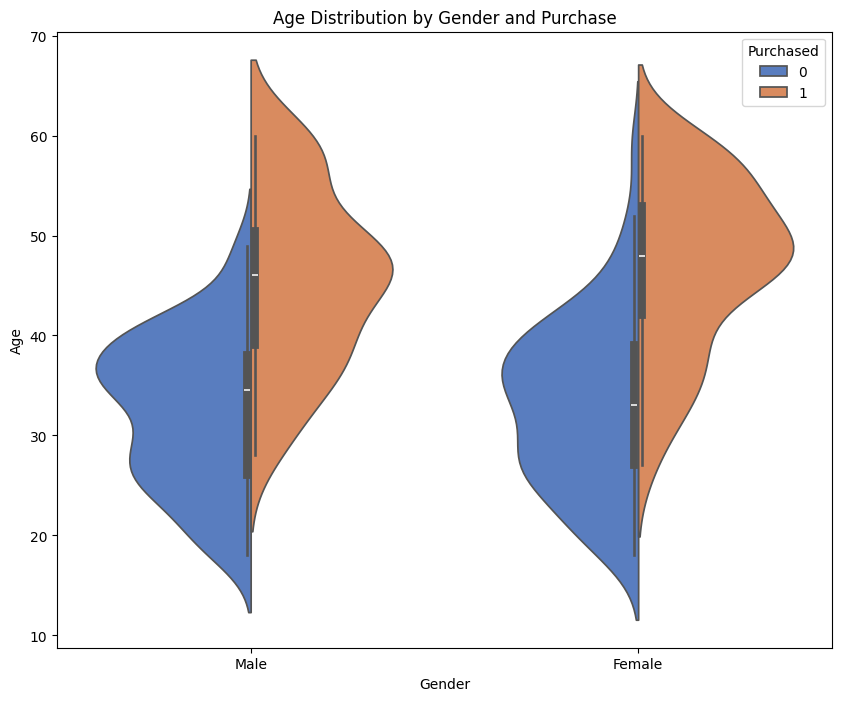

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='Gender', y='Age', hue='Purchased', split=True, palette='muted')
plt.title('Age Distribution by Gender and Purchase')
plt.show()


##Task 4

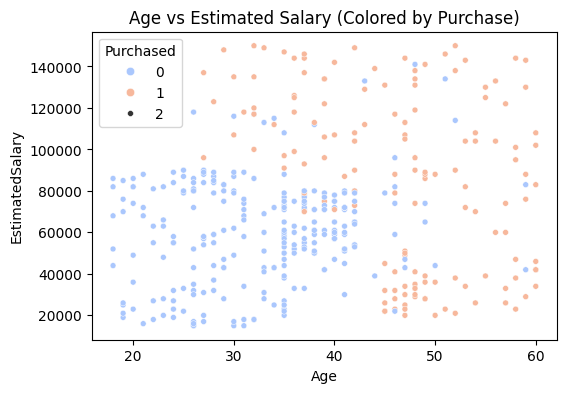

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', size= 2, palette='coolwarm')
plt.title('Age vs Estimated Salary (Colored by Purchase)')
plt.show()


##Task 5

/tmp/ipython-input-19-3739077008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='EstimatedSalary', palette='Spectral')


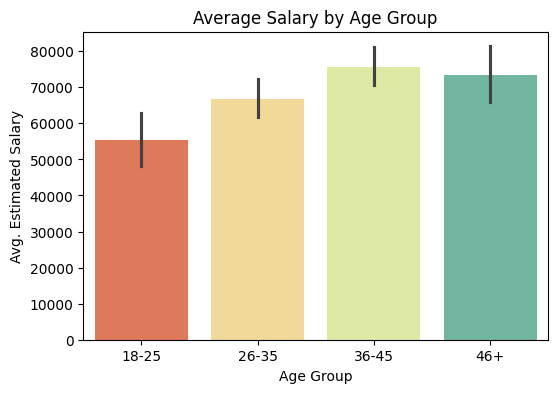

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='AgeGroup', y='EstimatedSalary', palette='Spectral')
plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg. Estimated Salary')
plt.show()


##Task 6

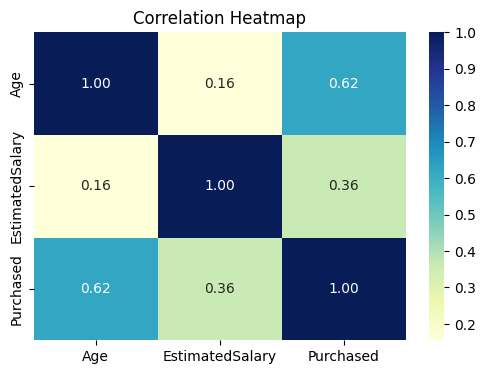

In [ ]:
plt.figure(figsize=(6, 4))
corr = df[['Age', 'EstimatedSalary', 'Purchased']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


##Task 7

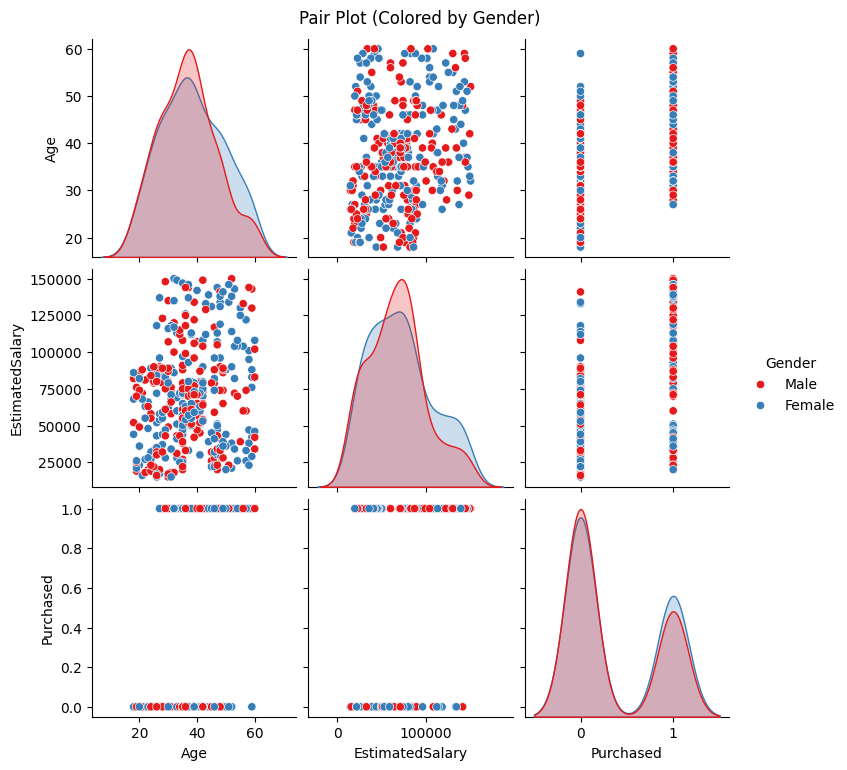

In [ ]:
sns.pairplot(df[['Age', 'EstimatedSalary', 'Purchased', 'Gender']], hue='Gender', palette='Set1')
plt.suptitle('Pair Plot (Colored by Gender)', y=1.02)
plt.show()


##Task 8

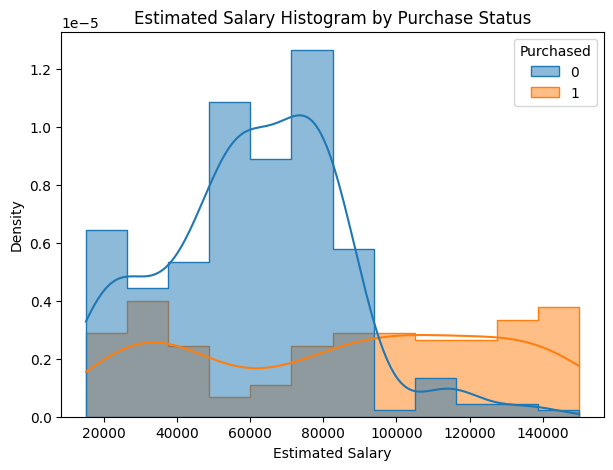

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased', kde=True, element='step', stat='density', alpha=0.5)
plt.title('Estimated Salary Histogram by Purchase Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()


##Task 9

/tmp/ipython-input-23-800874030.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary = df.groupby('AgeGroup')['EstimatedSalary'].mean().reset_index()


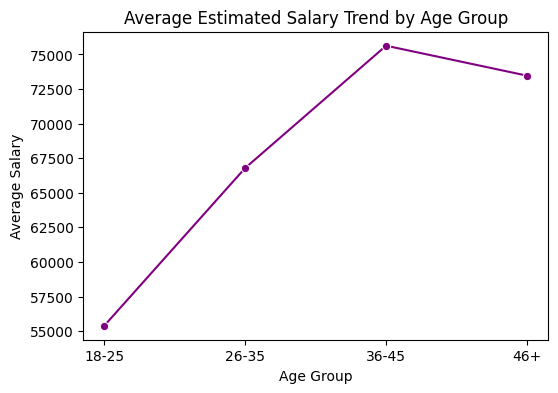

In [ ]:
avg_salary = df.groupby('AgeGroup')['EstimatedSalary'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=avg_salary, x='AgeGroup', y='EstimatedSalary', marker='o', linestyle='-', color='purple')
plt.title('Average Estimated Salary Trend by Age Group')
plt.ylabel('Average Salary')
plt.xlabel('Age Group')
plt.show()


##Task 10

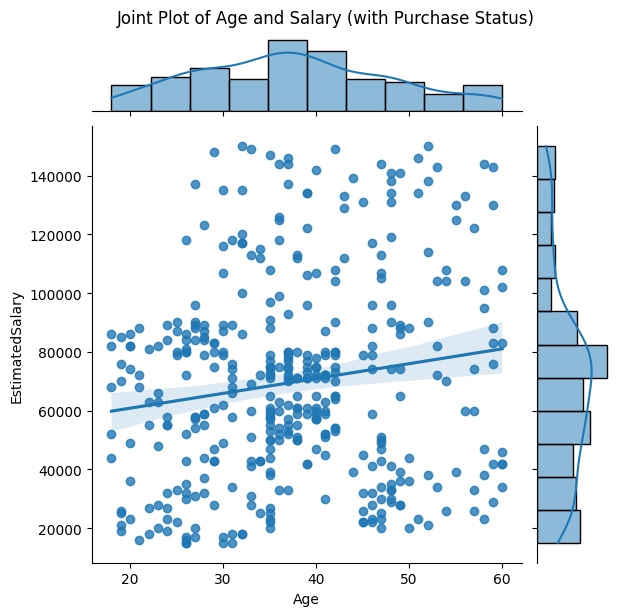

In [ ]:
sns.jointplot(data=df, x='Age', y='EstimatedSalary', kind='reg', palette='coolwarm')
plt.suptitle('Joint Plot of Age and Salary (with Purchase Status)', y=1.02)
plt.show()

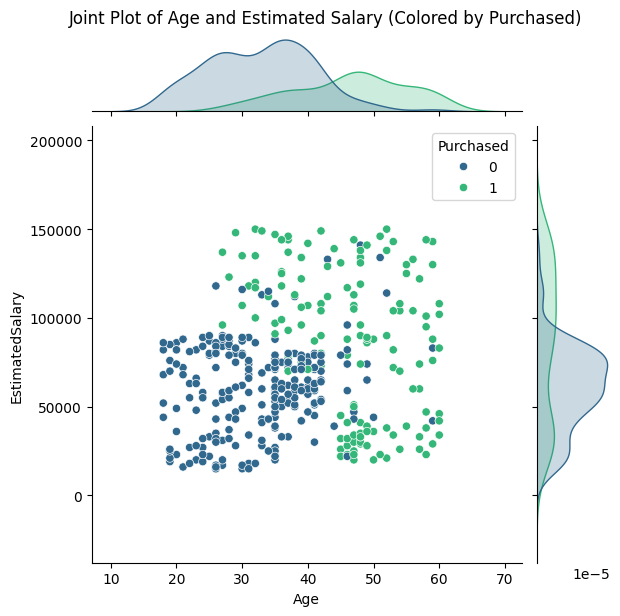

In [ ]:
import matplotlib.pyplot as plt
sns.jointplot(data=df, x='Age', y='EstimatedSalary', kind='scatter', hue='Purchased', palette='viridis')
plt.suptitle('Joint Plot of Age and Estimated Salary (Colored by Purchased)', y=1.02)
plt.show()